In [40]:
import phys_tools as pt
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
cd /Users/chris/Data/ephys_concentrations/

/Users/chris/Data/ephys_concentrations


# The Session

You will typically load a Session. A session contains:

* stimulus information
* Units (neurons) that were recorded in the session
* ...


To load, we just need to make a Session instance by telling this where the data lives. This is expecting a ".dat" file. 

__Note that path structure is important. Everything is found in the file structure relative to the dat path you give:__

```
+-- mouse_####/
|   sess_###/
|   |   a.dat
|   |   a.params
|   |   a_meta.h5
|   |   a_lfp.h5  (optional)
|   |   *.prb  (probe geometry definition, varies by recording)
|   |   a/  (generated by spyking-circus)
|   |   |    a.templates-1.hdf5
|   |   |    a.results-1.hdf5   

```

In [9]:
sess = pt.models.OdorSession("mouse_7992/sess_001/a.dat")

warning, no fs supplied in meta file. Using default of 25khz
warning, there are more than 1 final valve openings in trial.
warning, there are more than 1 final valve openings in trial.
warning, there are more than 1 final valve openings in trial.


## session stuff

So good

In [54]:
print(sess)  # sessions have a string representation that has some information about subject, session, and recording.

m7992s01rA


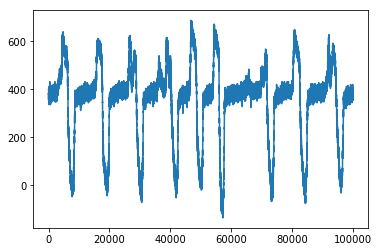

In [44]:
plt.plot(sess.sniff[:100000])  # sniff is loaded dynamically from disk only if you need

In [48]:
sess.inhales  # time of all inhalations, as detected by preprocessing

array([    6325,    17775,    28900, ..., 96714475, 96729525, 96745175])

In [47]:
sess.exhales

array([    8625,    20050,    31225, ..., 96717800, 96732675, 96748400])

In [52]:
sess.paths  # where do your files live

{'dat': '/Users/chris/Data/ephys_concentrations/mouse_7992/sess_001/a.dat',
 'lfp': '/Users/chris/Data/ephys_concentrations/mouse_7992/sess_001/a_lfp.h5',
 'meta': '/Users/chris/Data/ephys_concentrations/mouse_7992/sess_001/a_meta.h5',
 'probe': '/Users/chris/Data/ephys_concentrations/mouse_7992/sess_001/A2x32-Poly5_whisper_spyking_reverse_9B22.prb',
 'results': '/Users/chris/Data/ephys_concentrations/mouse_7992/sess_001/a/a.result-1.hdf5',
 'templates': '/Users/chris/Data/ephys_concentrations/mouse_7992/sess_001/a/a.templates-1.hdf5'}

# timing

All times are expressed in sample time, but there are some conversion methods to convert to msec and back.


In [38]:
sess.fs  # sample rate

25000.0

In [55]:
sess.samples_to_millis(5000)

200.0

In [56]:
sess.millis_to_samples(5000)

125000.0

## odors

In [18]:
sess.unique_odors

array(['(+)-carvone', '(-)-carvone', '(.38+_.62-)-carvone',
       '(.62+_.38-)-carvone', 'R(+)-limonene', 'a(+)-pinene'], 
      dtype='<U19')

In [23]:
odor_to_play_with = 'R(+)-limonene'

In [25]:
concentrations = sess.concentrations_by_odor[odor_to_play_with]  
# concentrations_by_odor is a dict holdling all the concentrations for that odor in this session
print(concentrations)

[  9.99999975e-05   1.00000005e-03   9.99999978e-03   9.98999998e-02]


## retrieving units

units are contained in sessions and can be retrieved with the following methods:

In [12]:
all_units = sess.units()  # this is all the units recorded that are of any quality.

In [14]:
single_units = sess.units_gte(3)  # units with a rating >= 3.

In [17]:
len(single_units)

7

In [32]:
u = single_units[1]  # just

# Units

Units contain the spiketimes, metadata for a given waveform sorted from the data. They also contain some class functions that can be used to extract or visualize data you like




In [36]:
# units contain the times where each spike was collected (in samples):
u.spiketimes

array([   57382,   187656,   236396, ..., 96744185, 96744561, 96748476], dtype=uint64)

In [33]:
u.fr  # average firing rate in Hz

11.905181256921137

## Built in functions

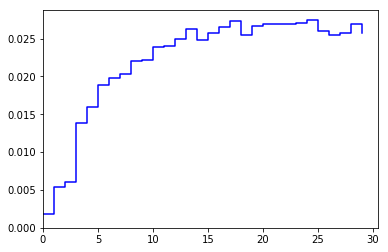

In [34]:
u.plot_autocorrelation()

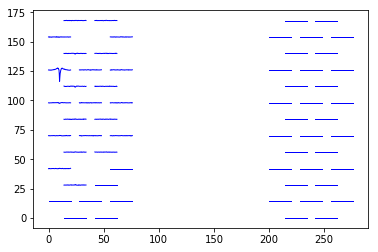

In [58]:
u.plot_template()  # display the waveform of the unit on the probe.

In [66]:
u.get_epoch_ms(5000,100000) # returns all the spike times within the and end in milliseconds

array([  7506.24,   9455.84,  10966.6 ,  17191.68,  18245.4 ,  19928.68,
        21024.  ,  25694.68,  26683.28,  28151.4 ,  28487.6 ,  32148.56,
        34224.68,  34732.8 ,  36274.76,  41307.36,  41354.32,  43332.56,
        43530.36,  46168.16,  51762.36,  52094.88,  52146.28,  54507.52,
        57505.52,  59562.72,  70509.28,  75759.72,  82417.36,  83945.48,
        85273.6 ,  88778.36,  91247.28,  91284.32,  91617.88,  92225.72,
        94332.56,  98609.84,  99000.6 ])

## odor plotting methods:

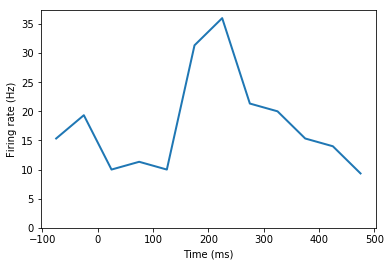

In [76]:
u.plot_odor_psth(odor_to_play_with, max(concentrations), 100, 500, 50)

(<matplotlib.axes._subplots.AxesSubplot at 0x111924f98>, 30)

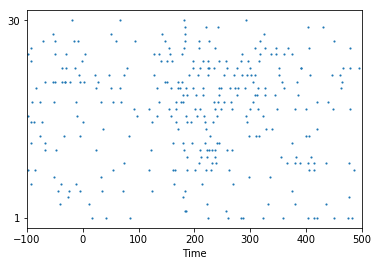

In [78]:
# sliu.plot_odor_rasters(odor_to_play_with, max(concentrations), 100, 500,markersize=5)

(<matplotlib.axes._subplots.AxesSubplot at 0x116b5bef0>, 30)

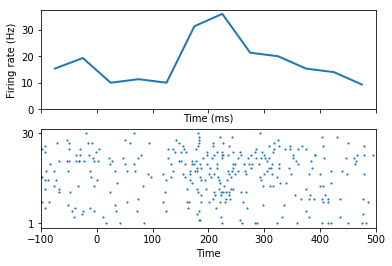

In [81]:
# you can use these methods on premade axes:

f, plots = plt.subplots(2,1, sharex=True)
psth, raster = plots  # same as psth = plots[0]; raster = plots[1]
u.plot_odor_psth(odor_to_play_with, max(concentrations), 100, 500, 50, axis=psth)
u.plot_odor_rasters(odor_to_play_with, max(concentrations), 100, 500,markersize=5, axis=raster)

In [83]:
u.get_odor_rasters(odor_to_play_with, max(concentrations), 100, 500)

# this returns 3 arrays:
# 1. the trial number of each spike (D = nspikes total)
# 2. the time of each spike (relative to inhalation onset for that trial) (D = nspikes total)
# 3. shape of the query (ntrials, (nmsec pre inhalation, nmsec post inhalation))

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
         1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
         4,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17,
        17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19,
        19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21,
        21, 